# **AI Virtual Career Counsellor**

## Decision Tree

In [1]:
# Install if running in Google Colab
!pip install -q matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import joblib

In [3]:
# Load dataset
url = "https://raw.githubusercontent.com/SiddardhaShayini/Career-Recommender-Dataset/refs/heads/main/dataset/cleaned_dataset.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,Drawing,Dancing,Singing,Sports,Video_Game,Acting,Travelling,Gardening,Animals,Photography,...,Doctor,Pharmisist,Cycling,Knitting,Director,Journalism,Bussiness,Listening_Music,Courses,Career_Options
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,BBA- Bachelor of Business Administration,"Business Analyst, Marketing Executive, HR Mana..."
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,BBA- Bachelor of Business Administration,"Business Analyst, Marketing Executive, HR Mana..."
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,BBA- Bachelor of Business Administration,"Business Analyst, Marketing Executive, HR Mana..."
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,BBA- Bachelor of Business Administration,"Business Analyst, Marketing Executive, HR Mana..."
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,BBA- Bachelor of Business Administration,"Business Analyst, Marketing Executive, HR Mana..."


In [5]:
# Encode target
le = LabelEncoder()
df['Courses_Encoded'] = le.fit_transform(df['Courses'])

In [6]:
# Shuffle dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [7]:
# Split features and target
X = df.drop(columns=['Courses', 'Career_Options', 'Courses_Encoded'])
y = df['Courses_Encoded']

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
# Predict
y_pred = model.predict(X_test)

In [11]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
# Print metrics
print(f" Accuracy: {accuracy:.2f}")
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" R-squared (R²): {r2:.2f}")

 Accuracy: 0.99
 Mean Squared Error (MSE): 1.14
 Root Mean Squared Error (RMSE): 1.07
 Mean Absolute Error (MAE): 0.05
 R-squared (R²): 0.99


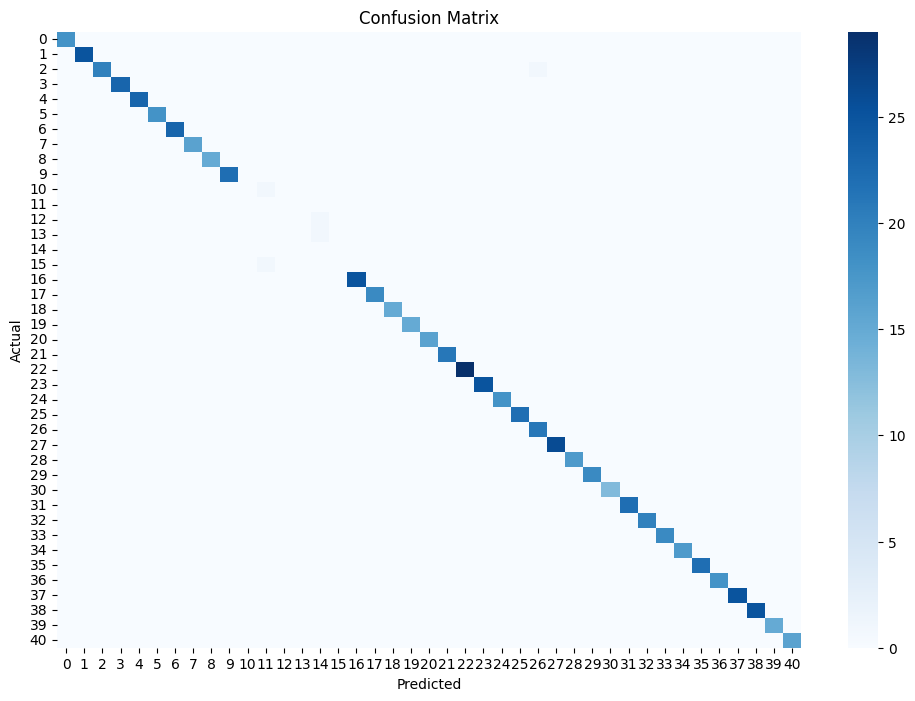

In [13]:
# Confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=False, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
# Get all class labels
all_labels = np.unique(y)
all_class_names = le.inverse_transform(all_labels)

# Classification report
from sklearn.metrics import classification_report

print("\n Classification Report:")
print(classification_report(
    y_test,
    y_pred,
    labels=all_labels,
    target_names=all_class_names,
    zero_division=0  # To suppress division by zero warnings
))



📋 Classification Report:
                                                     precision    recall  f1-score   support

                 Animation, Graphics and Multimedia       1.00      1.00      1.00        18
                   B.Arch- Bachelor of Architecture       1.00      1.00      1.00        25
                        B.Com- Bachelor of Commerce       1.00      0.95      0.98        21
                                              B.Ed.       1.00      1.00      1.00        23
                                B.Sc Bioinformatics       0.00      0.00      0.00         0
                                      B.Sc Genetics       0.00      0.00      0.00         0
                                 B.Sc Healthcare IT       0.00      0.00      0.00         0
                        B.Sc Medical Lab Technology       0.00      0.00      0.00         0
                              B.Sc- Applied Geology       1.00      1.00      1.00        23
                                      B.Sc-


###  **Model Summary: Decision Tree Classifier**

####  **Performance Metrics**

* **Accuracy**: **0.99** – The model correctly classified 99% of the test samples.
* **MSE (Mean Squared Error)**: 1.14
* **RMSE (Root Mean Squared Error)**: 1.07
* **MAE (Mean Absolute Error)**: 0.05
* **R-squared (R²)**: 0.99 – Indicates an excellent fit; model explains 99% of variance.

---

####  **Classification Report Highlights**

* **Perfect Precision, Recall, and F1-Score (1.00)** for **most well-represented careers** like:

  * **MBBS**, **BA in English**, **BCA**, **B.Ed.**, **BTech-CS**, etc.
* **Lower scores (0.00)** for careers with **zero or very low support** (e.g., `B.Sc Bioinformatics`, `B.Tech in Robotics`, etc.) indicating lack of training data for those classes.

>  **Note**: Classes with **0 support** or very low samples (1 or 0) can’t be reliably predicted and should be addressed via:
>
> * Data augmentation
> * Class balancing techniques
> * Filtering rarely occurring classes for production use

---

#### **Model Strengths**

* High accuracy and excellent classification metrics on the majority of classes.
* Well-suited for categorical career prediction given appropriate input features.

#### ⚠️ **Model Limitations**

* Fails to generalize on underrepresented classes (no training examples).
* Decision Tree models are prone to **overfitting**, especially with many class labels.



In [15]:
# Save the model
joblib.dump(model, "decision_tree_model.pkl")
print("\n Model saved as decision_tree_model.pkl")

# Provide download link in Colab
from google.colab import files
files.download("decision_tree_model.pkl")



 Model saved as decision_tree_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

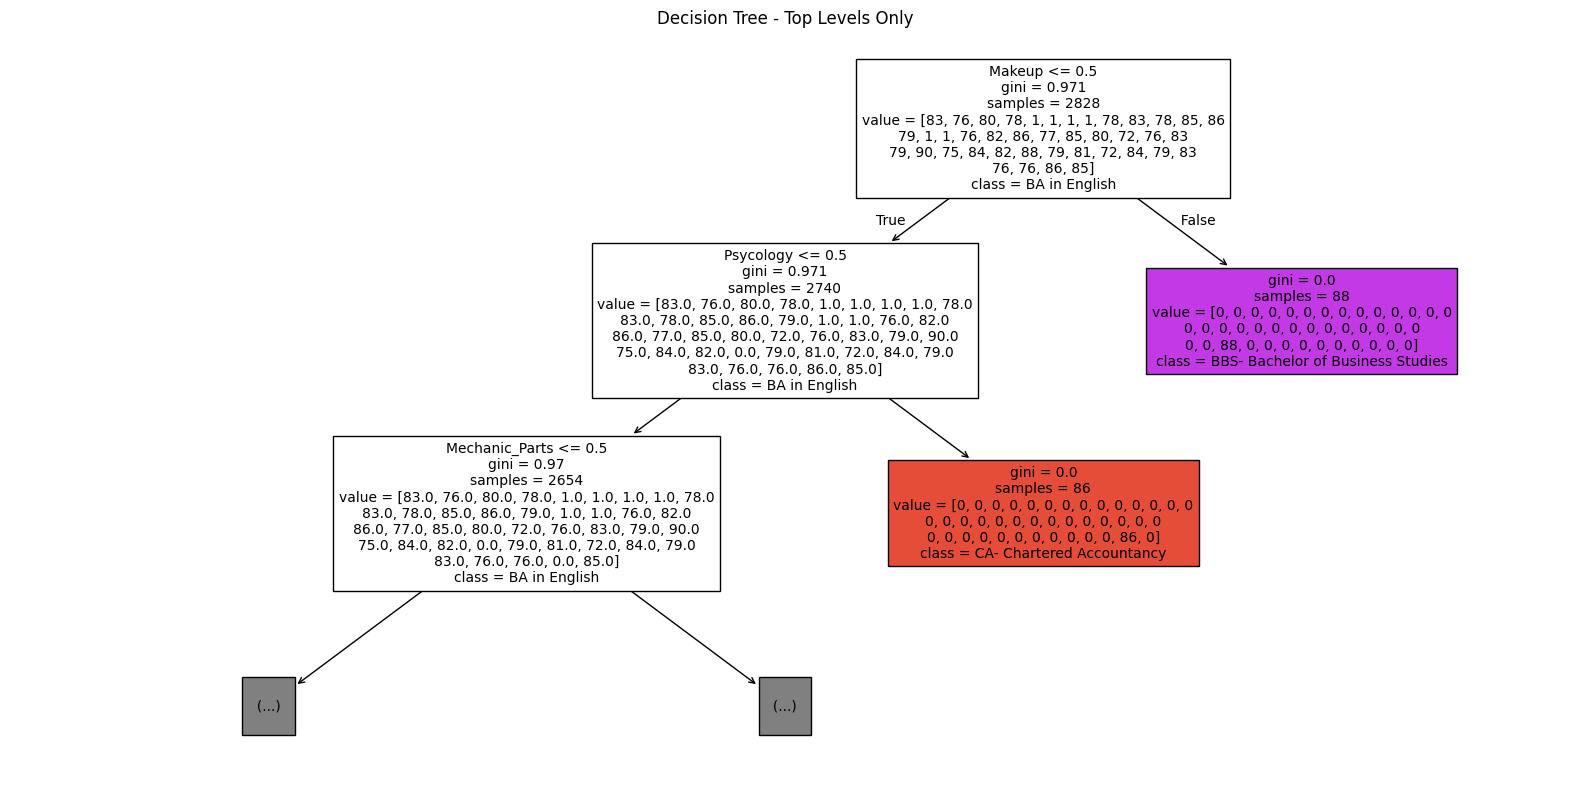

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model,
          filled=True,
          feature_names=X.columns,
          class_names=le.classes_,
          max_depth=2,  # Show first 2 levels for readability
          fontsize=10)
plt.title("Decision Tree - Top Levels Only")
plt.show()


In [20]:
# Simulate user input: all features must be binary (0 or 1) for 59 columns
input_data = np.zeros((1, 59))
input_data[0, [0, 5, 12, 15]] = 1  # e.g., Drawing, Acting, Teaching, Electricity_Components

# Predict
predicted_class = model.predict(input_data)[0]
predicted_course = le.inverse_transform([predicted_class])[0]

print(f"🎓 Recommended Course: {predicted_course}")


🎓 Recommended Course: BVA- Bachelor of Visual Arts


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
